In [4]:
import pandas as pd 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
import matplotlib.pyplot as plt # Plotting 
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from sklearn.model_selection import StratifiedShuffleSplit

data = pd.read_csv('data/research_data.csv')

In [25]:
data['one_two_author'] = ['1-2' if x < 3 else ">2" for x in data.author_count]

In [100]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X_train_matrix, y_train)

<AxesSubplot:xlabel='one_two_author'>

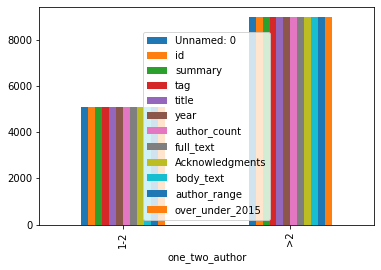

In [26]:
data.groupby(data.one_two_author).count().plot.bar()

In [96]:
X_train, X_test, y_train, y_test = train_test_split(list(data.body_text), list(data.over_under_2015),test_size=0.2)

In [97]:
vectorizor = TfidfVectorizer(stop_words = 'english', max_features=2000)
X_train_matrix = vectorizor.fit_transform(X_train)
X_test_matrix = vectorizor.fit_transform(X_test)
X_train_matrix = X_train_matrix.todense()
X_test_matrix = X_test_matrix.todense()
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X_train_matrix, y_train)

In [98]:
X_matrix = vectorizor.fit_transform(data.body_text)
X_matrix = X_matrix.todense()

In [99]:
corp_word_df = pd.DataFrame(X_matrix, columns = vectorizor.get_feature_names())

In [101]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(corp_word_df)

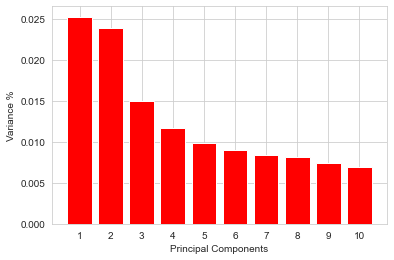

In [102]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)
plt.savefig('images/k_means_clustering')

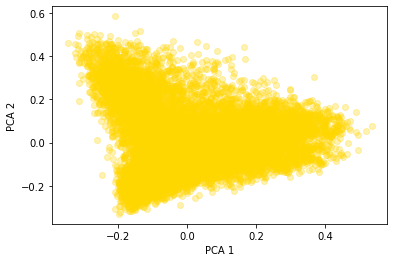

In [44]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

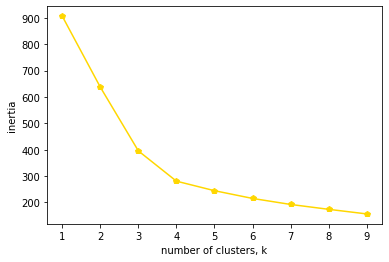

In [45]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

In [ ]:
edgecolors=((data.author_count-1)*3.4,(data.author_count-1)*3.4,(data.author_count-1)*3.4,0)

In [123]:
color_labels = []
for label in labels:
    if label == 2:
        color_labels.append('r')
    elif label == 1:
        color_labels.append('b')
    elif label == 0:
        color_labels.append('y')
    else:
        color_labels.append('g')

In [53]:
data['pca_quad'] = labels

In [94]:
data[data.pca_quad==0]

Unnamed: 0            id  \
0               0  1606.00776v2   
1               1  1705.08142v2   
4               4  1610.01076v1   
5               5  1705.07962v2   
7               7  1802.03268v2   
...           ...           ...   
13874       13874  1705.00754v1   
13911       13911  1705.02503v1   
13957       13957  1705.04396v2   
13981       13981  1705.05455v1   
14009       14009  1705.06861v1   

                                                 summary  \
0      We introduce the multiresolution recurrent neu...   
1      Multi-task learning is motivated by the observ...   
4      Together with the development of more accurate...   
5      Transforming a graphical user interface screen...   
7      We propose Efficient Neural Architecture Searc...   
...                                                  ...   
13874  Most natural videos contain numerous events. F...   
13911  Human motion and behaviour in crowded spaces i...   
13957  This paper summarises and analyses the cross-d...   
13981  The recognition of cursive script is regarded ...   
14009  This letter adopts long short-term memory(LSTM...   

                                                     tag  \
0      [{'term': 'cs.CL', 'scheme': 'http://arxiv.org...   
1      [{'term': 'stat.ML', 'scheme': 'http://arxiv.o...   
4      [{'term': 'cs.CV', 'scheme': 'http://arxiv.org...   
5      [{'term': 'cs.LG', 'scheme': 'http://arxiv.org...   
7      [{'term': 'cs.LG', 'scheme': 'http://arxiv.org...   
...                                                  ...   
13874  [{'term': 'cs.CV', 'scheme': 'http://arxiv.org...   
13911  [{'term': 'cs.CV', 'scheme': 'http://arxiv.org...   
13957  [{'term': 'cs.CV', 'scheme': 'http://arxiv.org...   
13981  [{'term': 'cs.CV', 'scheme': 'http://arxiv.org...   
14009  [{'term': 'cs.CV', 'scheme': 'http://arxiv.org...   

                                                   title  year  author_count  \
0      Multiresolution Recurrent Neural Networks: An ...  2016             7   
1      Learning what to share between loosely related...  2017             4   
4      Tutorial on Answering Questions about Images w...  2016             2   
5      pix2code: Generating Code from a Graphical Use...  2017             1   
7      Efficient Neural Architecture Search via Param...  2018             5   
...                                                  ...   ...           ...   
13874                  Dense-Captioning Events in Videos  2017             5   
13911                Context-Aware Trajectory Prediction  2017             4   
13957  Transfer Learning for Cross-Dataset Recognitio...  2017             3   
13981  Handwritten Urdu Character Recognition using 1...  2017             4   
14009  Prediction of Sea Surface Temperature using Lo...  2017             5   

                                               full_text  \
0      b'arXiv:1606.00776v2 [cs.CL] 14 Jun 2016\n\nMu...   
1      b'Learning what to share between loosely relat...   
4      b'Tutorial on Answering Questions about Images...   
5      b'arXiv:1705.07962v2 [cs.LG] 19 Sep 2017\n\npi...   
7      b'Efficient Neural Architecture Search via Par...   
...                                                  ...   
13874  b'Dense-Captioning Events in Videos\nRanjay Kr...   
13911  b'arXiv:1705.02503v1 [cs.CV] 6 May 2017\n\nBAR...   
13957  b'A\nTransfer Learning For Cross-Dataset Recog...   
13981  b"Handwritten Urdu Character Recognition\nusin...   
14009  b'SUBMITTED TO IEEE GEOSCIENCE AND REMOTE SENS...   

                                         Acknowledgments  \
0      \n[1] Bahdanau, D., Cho, K., and Bengio, Y. (2...   
1      \nAndreas Argyriou, Theodoros Evgeniou, and Ma...   
4      \nJacob Andreas, Marcus Rohrbach, Trevor Darre...   
5      \n[1] D. Bahdanau, K. Cho, and Y. Bengio. Neur...   
7      \n\nHe, Kaiming, Zhang, Xiangyu, Rein, Shaoqin...   
...                                                  ...   
13874  \n[1] A. Alahi, K. Goel, V. Ramanat

In [66]:
pca_word_strength = (pd.DataFrame(pca.components_[:2],columns=vectorizor.get_feature_names(),index = ['PC-1','PC-2'])).T

In [123]:
pca_word_strength[pca_word_strength['PC-1'] > 0 ]

Empty DataFrame
Columns: [PC-1, PC-2]
Index: []

In [88]:
pca_word_strength.loc[pca_word_strength['PC-1'].idxmax()]

PC-1    0.471868
PC-2    0.025242
Name: image, dtype: float64

In [119]:
pca_word_strength['PC-1'].nsmallest(10)

word         -0.219362
words        -0.114817
sentence     -0.105619
language     -0.094971
et           -0.077657
al           -0.076846
corpus       -0.071893
embeddings   -0.070909
sentences    -0.070005
variables    -0.060026
Name: PC-1, dtype: float64

In [118]:
pca_word_strength['PC-2'].nsmallest(10)

algorithm     -0.133055
xi            -0.091165
variables     -0.090568
theorem       -0.087040
let           -0.071364
function      -0.069414
graph         -0.067284
problem       -0.063979
probability   -0.063622
proof         -0.062341
Name: PC-2, dtype: float64

In [117]:
pca_word_strength['PC-2'].nlargest(10)

word          0.363532
et            0.200421
al            0.199697
sentence      0.178639
words         0.169691
lstm          0.165016
model         0.143703
language      0.135811
training      0.134079
embeddings    0.134030
Name: PC-2, dtype: float64

In [124]:
pca_word_strength['PC-1'].nlargest(20)

image             0.471868
images            0.344713
cnn               0.152197
segmentation      0.130171
object            0.127900
network           0.118404
detection         0.111639
layer             0.106028
convolutional     0.106013
layers            0.101130
feature           0.097183
face              0.093762
training          0.092632
deep              0.092333
fig               0.090396
pixel             0.090068
features          0.089267
pixels            0.081098
classification    0.080444
recognition       0.077796
Name: PC-1, dtype: float64

In [89]:
[pca_word_strength['PC-1'].idxmax()]

['image']

In [90]:
[pca_word_strength['PC-2'].idxmax()]

['word']

In [91]:
[pca_word_strength['PC-2'].idxmin()]

['algorithm']

In [92]:
[pca_word_strength['PC-1'].idxmin()]

['word']

In [ ]:
(pd.DataFrame(pca.components_[:2],columns=vectorizor.get_feature_names(),index = ['PC-1','PC-2']))

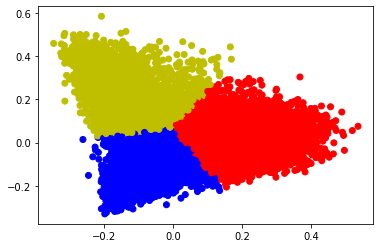

In [46]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])
color_labels = []
labels = model.predict(PCA_components.iloc[:,:2])
for label in labels:
    if label == 2:
        color_labels.append('r')
    elif label == 1:
        color_labels.append('b')
    elif label == 0:
        color_labels.append('y')
    else:
        color_labels.append('g')
plt.scatter(PCA_components[0], PCA_components[1], c=color_labels)
plt.show()

In [48]:
from seaborn import set_style

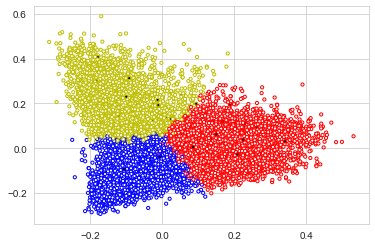

In [121]:
set_style("whitegrid")
plt.scatter(PCA_components[0], PCA_components[1], c=['black' if x > 10 else 'white' for x in data.author_count], s=(10), edgecolors = color_labels)
plt.legend('b'='npl')
plt.show()

In [ ]:
#top ten keywords in first and second eigon vecor

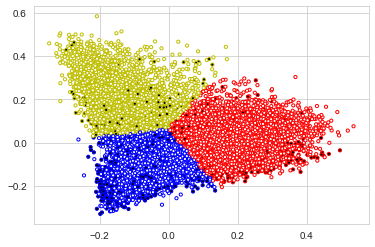

In [50]:
set_style("whitegrid")
plt.scatter(PCA_components[0], PCA_components[1], c=['black' if x == '<2015' else 'white' for x in data.over_under_2015], s=(10), edgecolors = color_labels)
plt.show()

In [ ]:
#keyword weights: eigon vecors of the pca
#what keywords have the highest weight

In [152]:
randForest = RandomForestClassifier(class_weight="balanced")
randForest.fit(X_train_matrix, y_train)

RandomForestClassifier(class_weight='balanced_subsample')

In [103]:
#resampled data
randForest = RandomForestClassifier(class_weight="balanced")
randForest.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced')

In [ ]:
#create train and test split over X_res, y_res
#


In [104]:
y_pred = randForest.predict(X_test_matrix)
confusion_matrix(y_test, y_pred)

array([[  55,  720],
       [  58, 1981]])

In [105]:
randForest_accuacy = accuracy_score(y_test, y_pred)

In [106]:
randForest_accuacy

0.7235252309879175

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_res, y_res)

In [111]:
y_pred = clf.predict(X_test_matrix)
confusion_matrix(y_test, y_pred)

array([[ 294,  481],
       [ 644, 1395]])

In [112]:
accuracy_score(y_test, y_pred)

0.6002132196162047

In [113]:
from sklearn.naive_bayes import MultinomialNB
gb = MultinomialNB().fit(X_res, y_res)
y_pred = gb.predict(X_test_matrix)
confusion_matrix(y_test, y_pred)

array([[ 412,  363],
       [ 620, 1419]])

In [114]:
accuracy_score(y_test, y_pred)

0.6506751954513148

In [129]:
gb.predict_proba(X_test_matrix)#[:,1]

array([[0.61057004, 0.38942996],
       [0.55343848, 0.44656152],
       [0.44325584, 0.55674416],
       ...,
       [0.46090424, 0.53909576],
       [0.40914592, 0.59085408],
       [0.3433191 , 0.6566809 ]])

In [131]:
y_test[0]

'>=2015'

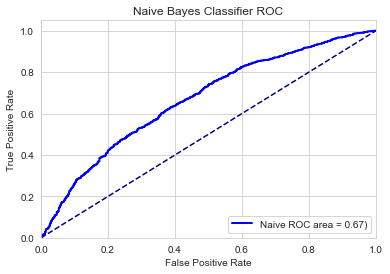

In [134]:
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test_matrix)[:,1], pos_label = '>=2015')
roc_auc = auc(fpr, tpr)
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Naive Bayes Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='Naive ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

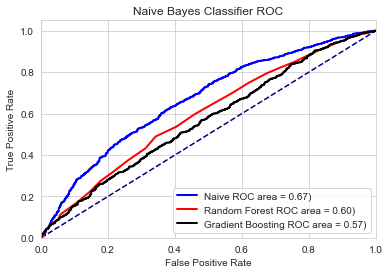

In [139]:
fpr1, tpr1, thresholds = roc_curve(y_test, randForest.predict_proba(X_test_matrix)[:,1], pos_label = '>=2015')
roc_auc = auc(fpr1, tpr1)
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test_matrix)[:,1], pos_label = '>=2015')
fpr2, tpr2, thresholds = roc_curve(y_test, clf.predict_proba(X_test_matrix)[:,1], pos_label = '>=2015')

roc_auc1 = auc(fpr1, tpr1) 
roc_auc2 = auc(fpr2, tpr2) 
roc_auc = auc(fpr, tpr) 

plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Naive Bayes Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='Naive ROC area = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, color='red', lw=2, label='Random Forest ROC area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='black', lw=2, label='Gradient Boosting ROC area = %0.2f)' % roc_auc2)
plt.legend(loc="lower right")
plt.show()

In [ ]:
#import a roc curve 
#logistic regression func

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
#if i could make work: determine: self improvement in .....cannot
#popularity in ai growing: lingo developing ect. 

In [ ]:
#under: .49
#over 5k: .72, over 10k: .71
#over 2k: 0.73
# 5050
#72/28
#possible over 1k:
#SMOTEover: 0.675
#other models showing different result?
#change number count for words to ~10,000!!!
#max_df?
#filtering out 2 letter words
#gradient boosting 2 classes
#nieve bayes 2 classes
#extra:oversampling


In [24]:
randForest_accuacy

0.720682302771855

In [25]:
base_accuracy = accuracy_score(y_test, (['>=2015']*len(y_test)))
base_accuracy

0.7281449893390192

In [ ]:
(.50)

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
reg.fit(X_train_matrix, y_train)

TypeError: score() missing 1 required positional argument: 'y'

In [64]:
X_pred = reg.predict(X_test_matrix)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
# reg_rmse = mean_squared_error(y_test, X_pred, squared=False)

In [66]:
reg_rmse

2.038075593879237

In [89]:
base_accuracy = mean_squared_error(y_test, ([3]*len(y_test)), squared=False)
base_accuracy

ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'